## **Imports**

In [ ]:
# Importing Library
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_diabetes

## **Understanding Multiple Linear Regression**


**Simple Linear Regression** works with one input (independent) variable and one output (dependent) variable. Now, let's explore **Multiple Linear Regression**.

*   **Why Multiple Linear Regression?**
    *   In the real world, most things aren't affected by just one factor.
    *   Multiple Linear Regression allows us to consider **multiple input variables** to predict a single output variable.
    *   This makes our models more realistic and often more accurate.

*   **How it Works (Simply)**
    *   Imagine you're trying to predict a student's test score based on how many hours they studied and their previous test scores.
    *   Multiple Linear Regression finds the best "line" (or more accurately, a hyperplane in higher dimensions) that fits all these input variables to the output (the test score).
    *   The model learns how much each input variable contributes to the output.

*   **The Formula**

    The general formula for Multiple Linear Regression is:

    $$y = \beta_0 + \beta_1x_1 + \beta_2x_2 + ... + \beta_nx_n + \epsilon$$

    Where:
    *   $y$ is the dependent variable (what you are trying to predict).
    *   $\beta_0$ is the intercept.
    *   $\beta_1, \beta_2, ..., \beta_n$ are the coefficients for each independent variable.
    *   $x_1, x_2, ..., x_n$ are the independent variables (the factors you are using to predict $y$).
    *   $\epsilon$ is the error term.

## **Loading Dataset**

In [ ]:
# Loading the diabetes dataset
X,y = load_diabetes(return_X_y=True)

In [ ]:
# Displaying the independent variables
X

array([[ 0.03807591,  0.05068012,  0.06169621, ..., -0.00259226,
         0.01990749, -0.01764613],
       [-0.00188202, -0.04464164, -0.05147406, ..., -0.03949338,
        -0.06833155, -0.09220405],
       [ 0.08529891,  0.05068012,  0.04445121, ..., -0.00259226,
         0.00286131, -0.02593034],
       ...,
       [ 0.04170844,  0.05068012, -0.01590626, ..., -0.01107952,
        -0.04688253,  0.01549073],
       [-0.04547248, -0.04464164,  0.03906215, ...,  0.02655962,
         0.04452873, -0.02593034],
       [-0.04547248, -0.04464164, -0.0730303 , ..., -0.03949338,
        -0.00422151,  0.00306441]])

In [ ]:
# Displaying the dependent variables
y[:10]

array([151.,  75., 141., 206., 135.,  97., 138.,  63., 110., 310.])

## **Using Sklearn's Linear Regression**

In [ ]:
# Importing the train_test_split
from sklearn.model_selection import train_test_split

In [ ]:
# Splitting the data into training and testing sets
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [ ]:
# Printing the shapes of the training and testing sets
print(X_train.shape)
print(X_test.shape)

(353, 10)
(89, 10)


In [ ]:
# Importing the Linear Regression model from scikit-learn
from sklearn.linear_model import LinearRegression

In [ ]:
# Creating an instance of the Linear Regression model
reg = LinearRegression()

In [ ]:
# Fitting (training) the Linear Regression model using the training data
reg.fit(X_train, y_train)

LinearRegression()

In [ ]:
# Making predictions on the test data
y_pred = reg.predict(X_test)

In [ ]:
# Importing the r2_score function
from sklearn.metrics import r2_score

In [ ]:
# Calculating and displaying the R-squared score
r2_score(y_test, y_pred)

0.4399338661568968

In [ ]:
# Displaying the coefficients
reg.coef_

array([  -9.15865318, -205.45432163,  516.69374454,  340.61999905,
       -895.5520019 ,  561.22067904,  153.89310954,  126.73139688,
        861.12700152,   52.42112238])

In [ ]:
# Displaying the intercept
reg.intercept_

np.float64(151.88331005254167)

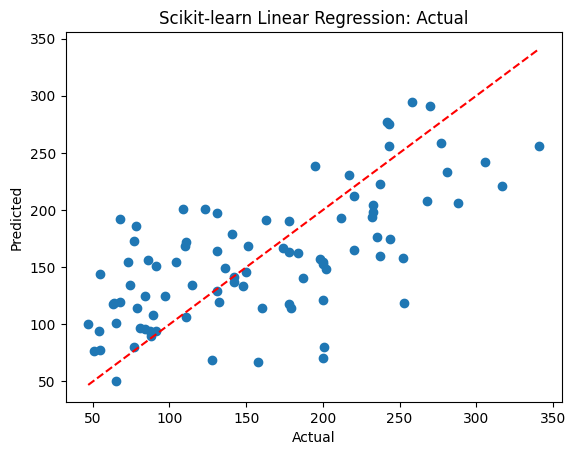

In [ ]:
plt.scatter(y_test, y_pred)
# Plot a reference line
plot_min = min(y_test.min(), y_pred.min())
plot_max = max(y_test.max(), y_pred.max())
plt.plot([plot_min, plot_max], [plot_min, plot_max], 'r--')

plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("Scikit-learn Linear Regression: Actual")
plt.show()

## **Making our own Linear Regression Class**

In [ ]:
class MulLR:
    # Custom class for Multiple Linear Regression

    def __init__(self):
        # Initialize coefficients and intercept
        self.coef_ = None
        self.intercept_ = None

    def fit(self, X_train, y_train):
        # Fit the model to the training data

        # Add a column of ones to X_train for the intercept term
        X_train = np.insert(X_train, 0, 1, axis=1)

        # Calculate the coefficients (betas) using the Normal Equation: (X^T * X)^(-1) * X^T * y
        betas = np.linalg.inv(np.dot(X_train.T, X_train)).dot(X_train.T).dot(y_train)

        # Extract the intercept (first element of betas) and coefficients (remaining elements)
        self.intercept_ = betas[0]
        self.coef_ = betas[1:]

    def predict(self, X_test):
        # Make predictions on the test data

        # Calculate the predictions using the formula: y_pred = X_test * coef_ + intercept_
        y_pred = np.dot(X_test, self.coef_) + self.intercept_
        return y_pred

In [ ]:
# Creating an instance of our custom Multiple Linear Regression model
lr = MulLR()

In [ ]:
# Fitting (training) the custom model using the training data
lr.fit(X_train, y_train)

In [ ]:
# Making predictions on the test data using the custom model
y_pred = lr.predict(X_test)

In [ ]:
# Calculating and displaying the R-squared score of the custom model on the test data
r2_score(y_test, y_pred)

0.43993386615689634

In [ ]:
# Displaying the coefficients
lr.coef_

array([  -9.15865318, -205.45432163,  516.69374454,  340.61999905,
       -895.5520019 ,  561.22067904,  153.89310954,  126.73139688,
        861.12700152,   52.42112238])

In [ ]:
# Displaying the intercept
lr.intercept_

np.float64(151.88331005254165)

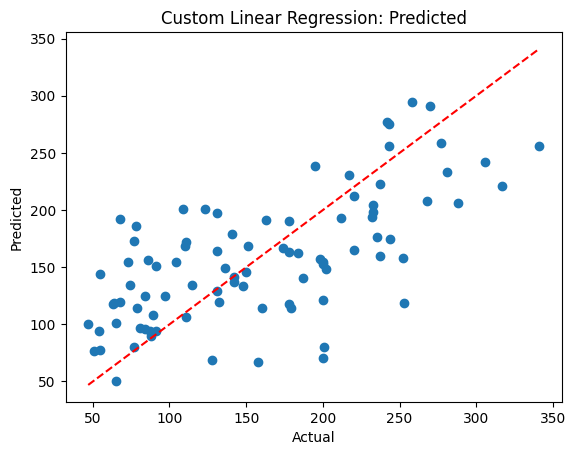

In [ ]:
plt.scatter(y_test, y_pred)
# Plot a reference line
plot_min = min(y_test.min(), y_pred.min())
plot_max = max(y_test.max(), y_pred.max())
plt.plot([plot_min, plot_max], [plot_min, plot_max], 'r--')

plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("Custom Linear Regression: Predicted")
plt.show()

## **Conclusion**


*   **Model Equivalence:** The custom Multiple Linear Regression implementation produced results identical to scikit-learn's Linear Regression model.
*   **Consistent Performance:** Both models showed the same R² score.
*   **Matching Parameters:** The coefficients and intercept calculated by both implementations were identical.
*   **Visual Agreement:** The actual vs. predicted value plots for both models were nearly identical.
*   **Successful Implementation:** This validates the custom model's accuracy and demonstrates successful implementation of the Normal Equation.